# **Clase 2 - APIs**

# Explorando la API de Wikipedia




In [3]:
import requests
resp = requests.get("http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&titles=mantis_shrimp")
print(resp.status_code)   
print(resp.json())

200
{'batchcomplete': '', 'query': {'normalized': [{'from': 'mantis_shrimp', 'to': 'Mantis shrimp'}], 'pages': {'297924': {'pageid': 297924, 'ns': 0, 'title': 'Mantis shrimp', 'contentmodel': 'wikitext', 'pagelanguage': 'en', 'pagelanguagehtmlcode': 'en', 'pagelanguagedir': 'ltr', 'touched': '2020-05-15T14:07:19Z', 'lastrevid': 956666362, 'length': 43710}}}}


# Componentes de una API

API Base URL : http://en.wikipedia.org/w/api.php


Key-value attribute pairs:

1.   action=query

2.   prop=info

3.   format=json

4.   titles=Stanford%20University 



In [0]:
url = 'http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&titles=Stanford%20University'
resp = requests.get(url)
data = resp.json()
data

{'batchcomplete': '',
 'query': {'pages': {'26977': {'contentmodel': 'wikitext',
    'lastrevid': 927316873,
    'length': 126792,
    'ns': 0,
    'pageid': 26977,
    'pagelanguage': 'en',
    'pagelanguagedir': 'ltr',
    'pagelanguagehtmlcode': 'en',
    'title': 'Stanford University',
    'touched': '2019-11-22T14:48:41Z'}}}}

# Usando libreria Wikipedia

In [4]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=2ad3d45b69910eb1aedbe8e91cd7ee9599944c87747768af0655e81a0dea2018
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
import wikipedia

In [6]:
print(wikipedia.search("Mantis_Shrimp"))

['Mantis shrimp', 'Odontodactylus scyllarus', 'Squilla mantis', 'Shrimp', 'Lysiosquillina maculata', 'Crustacean', 'Hydroxyapatite', 'Ambush predator', 'Oratosquilla oratoria', 'Prawn']


In [0]:
wikipedia.set_lang("en")  

In [31]:
print(wikipedia.summary("Mantis_Shrimp"))


Mantis shrimps, or stomatopods, are marine crustaceans of the order Stomatopoda. Some species have specialised calcified "clubs" that can strike with great power, while others have sharp forelimbs used to capture prey. They branched from other members of the class Malacostraca around 340 million years ago. Mantis shrimps typically grow to around 10 cm (3.9 in) in length. A few can reach up to 38 cm (15 in). The largest mantis shrimp ever caught had a length of 46 cm (18 in); it was caught in the Indian River near Fort Pierce, Florida, in the United States. A mantis shrimp's carapace (the bony, thick shell that covers crustaceans and some other species) covers only the rear part of the head and the first four segments of the thorax. Varieties range in color from shades of brown to vivid colors, with more than 450 species of mantis shrimps being known. They are among the most important predators in many shallow, tropical and subtropical marine habitats. However, despite being common, the

In [32]:
print(wikipedia.summary("Mantis_Shrimp", sentences=1))

Mantis shrimps, or stomatopods, are marine crustaceans of the order Stomatopoda.


In [0]:
content_ms = wikipedia.page("Mantis_Shrimp").content

Preprocesamiento

In [36]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_and_tokenize(text: str, lang: str):
	#Obetneer stopwrods dependiendo del lenguaje  
  st = stopwords.words(lang)
  #Lemmatizer
  wordnet_lemmatizer = WordNetLemmatizer()

	#Todos los tokens
  tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

  filtered_tokens = []
  for token in tokens:
      token = re.sub(r'[^\w\s]','',token) #eliminar espacios en blanco
      if re.search('[a-zA-Z]', token) and (token not in st):
          filtered_tokens.append(wordnet_lemmatizer.lemmatize(token))
  return filtered_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

content_ms_prep = clean_and_tokenize(content_ms, 'english')
wordcloud = WordCloud( max_words=100,background_color="white").generate(' '.join(content_ms_prep))

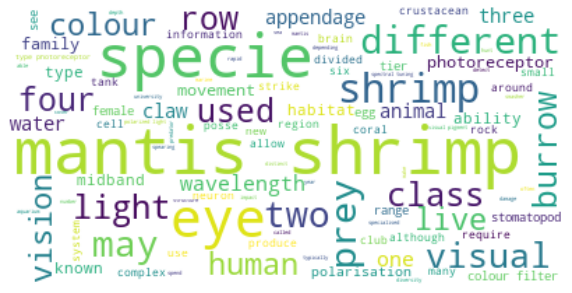

In [44]:
# Display the generated image:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()